In [2]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/install_pytorch/직접실습")

In [3]:
from google.colab import drive
drive.mount('/content/drive')
from multiclass_functions1_video import *
import torch
from torch import nn,optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cuda


In [4]:
BATCH_SIZE = 32
LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()
new_model_train = True
model_type = "MLP"
dataset = "MNIST"
save_model_path = f"/content/drive/MyDrive/Colab Notebooks/results/{model_type}_{dataset}.pt"


In [5]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)


In [6]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(
            nn.Linear(28*28,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self,x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [7]:
model = MLP().to(device)
print(model)
x_batch, _ = next(iter(train_DL))
x_batch.shape
print(model(x_batch.to(device)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


Epoch: 1, train loss: 0.313
--------------------
Epoch: 2, train loss: 0.14
--------------------
Epoch: 3, train loss: 0.097
--------------------
Epoch: 4, train loss: 0.073
--------------------
Epoch: 5, train loss: 0.058
--------------------


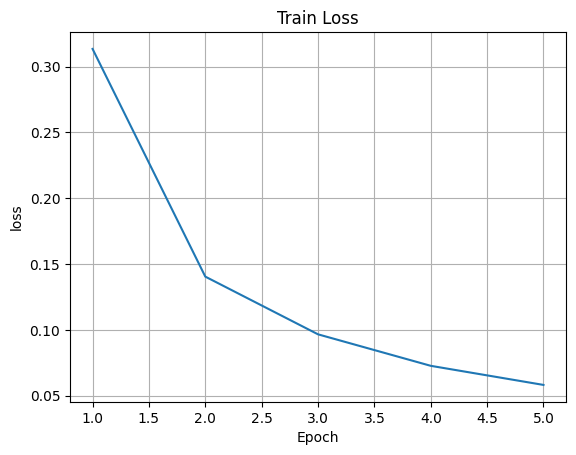

In [8]:
if new_model_train:
    optimizer = optim.Adam(model.parameters(),lr=LR)
    loss_history = Train(model,train_DL,criterion,optimizer=optimizer,EPOCH=EPOCH)

    torch.save(model.state_dict(),save_model_path)

    plt.plot(range(1,EPOCH+1),loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.title("Train Loss")
    plt.grid()

In [9]:
load_model= MLP() # 먼저 모델 구조를 정의하고
load_model.state_dict(torch.load(save_model_path, map_location=device))

/tmp/ipython-input-643309101.py:2: FutureWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/main/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  load_model.state_dict(torch.load(save_model_path, map_location=device))


OrderedDict([('linear.0.weight',
              tensor([[-0.0031,  0.0088, -0.0263,  ...,  0.0233, -0.0202,  0.0032],
                      [ 0.0119, -0.0061,  0.0207,  ..., -0.0017,  0.0005,  0.0307],
                      [-0.0252,  0.0231, -0.0167,  ..., -0.0078, -0.0227,  0.0185],
                      ...,
                      [ 0.0045, -0.0234, -0.0006,  ..., -0.0310,  0.0112, -0.0067],
                      [-0.0231,  0.0127, -0.0309,  ...,  0.0076,  0.0011,  0.0044],
                      [ 0.0267,  0.0196,  0.0004,  ..., -0.0098, -0.0310,  0.0229]])),
             ('linear.0.bias',
              tensor([-0.0341, -0.0085,  0.0056,  0.0266, -0.0216, -0.0192,  0.0067, -0.0064,
                      -0.0351,  0.0259,  0.0245, -0.0347,  0.0156,  0.0208,  0.0085,  0.0285,
                      -0.0152, -0.0241, -0.0265,  0.0190,  0.0213,  0.0328, -0.0180, -0.0217,
                       0.0155,  0.0209,  0.0101, -0.0139, -0.0240, -0.0342,  0.0233,  0.0128,
                      -0.0

In [10]:
Test(model,test_DL)
print(count_params(load_model))


Test accuracy: 9694/10000 (96.9 %)
79510


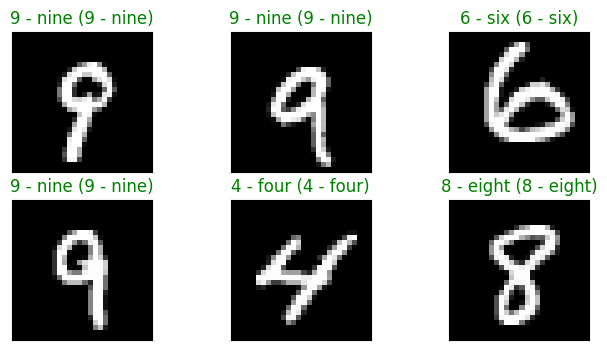

In [11]:
Test_plot(model,test_DL)